In [20]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

# Question 1:

# part 2:

In [21]:
#define image1 here
image1 = np.array([[141, 0 , 138, 143, 143, 143, 144],
[141, 140, 140, 142, 142, 143, 143],
[140, 145, 145, 144, 142, 142, 145],
[141, 141, 141, 143, 142, 141, 143],
[139, 140, 141, 141, 142, 143, 144]
],np.uint8)

# unique, counts = np.unique(image1, return_counts=True)

# image1.ndim
# image1
# image1.shape[1]
# image1.max()
# image1[15]
# image1[1][3]

In [22]:
#code here
#first define a function for calculating histogram
#you are free to use libraries
def calc_hist(image):
    '''
    you are free to use libraries
    calculate image histogram
    input(s):
      image (ndarray): input image
    output(s):
      hist (ndarray): computed input image histogram
    '''
    hist = np.zeros(256,dtype=int)
    hist= np.histogram(image,bins = range(0,256))[0]
    return hist

Text(0.5, 1.0, 'histogram')

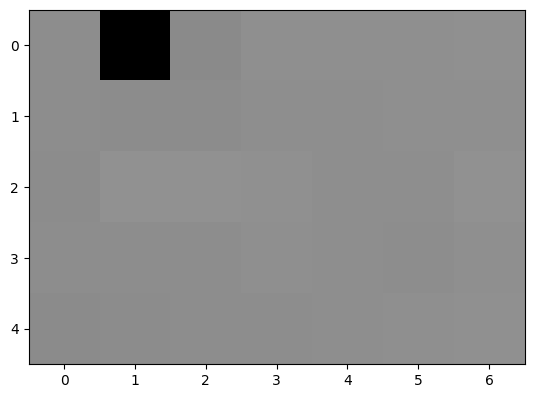

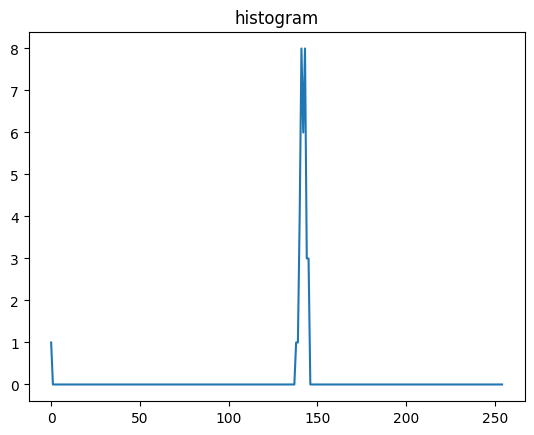

In [23]:
#dont change this cell
plt.imshow(image1,cmap='gray',vmin=0,vmax=255)
plt.figure()
plt.plot(calc_hist(image1))
plt.title('histogram')

In [24]:
#code here
#define a function (stretch) for stretching(input:image , output: stretched image)

def stretch_hist(image):
  '''
  don't use libraries
  input(s):
    image (ndarray): input image
  output(s):
    output_image (ndarray): enhanced image with histogram stretching
  '''
  output_image = image.copy()
  # Start
  for x in range(image.shape[0]):
    for y in range(image.shape[1]):
      numerator = image[x][y] - image.min()
      denumerator = image.max() - image.min()
      output_image[x][y] = (numerator / denumerator) * 255
  # End
  return output_image


Text(0.5, 1.0, 'stretched histogram')

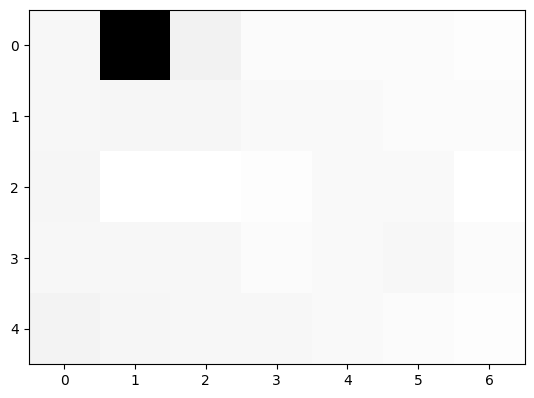

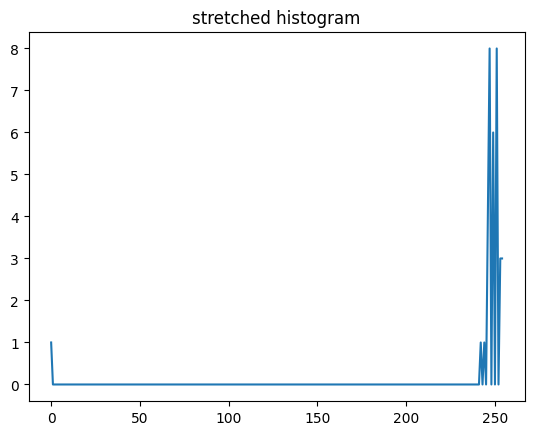

In [25]:
#dont change this cell
plt.imshow(stretch_hist(image1),cmap='gray',vmin=0,vmax=255)
plt.figure()
plt.plot(calc_hist(stretch_hist(image1)))
plt.title('stretched histogram')

In [26]:
#code here
#define a function (Clip) for Clipping(input:image , output: Clipped image)

def clip_hist(image, min_value, max_value):
  '''
  don't use libraries
  input(s):
    image (ndarray): input image
    min_value : min value of the histogram which you wanna clip.
    max_value : max value of the histogram which you wanna clip.
  output(s):
    output_image (ndarray): enhanced image with histogram clipping
  '''
  output_image = image.copy()
  # Start

  for x in range(image.shape[0]):
      for y in range(image.shape[1]):
        numerator = image[x][y] - min_value
        if numerator <= 0 :
          output_image[x][y] = 0
        else:
          denumerator = max_value - min_value
          if numerator > denumerator:
            output_image[x][y] = 255
          else:
            output_image[x][y] = (numerator / denumerator) * 255
  # End
  return output_image


In [27]:
image = image1.copy()
output_image = image1.copy()
min_value = 139
max_value = 144
cnt = 0 
for x in range(image.shape[0]):
    for y in range(image.shape[1]):
      numerator = image[x][y] - min_value
      if numerator <= 0 :
        output_image[x][y] = 0
        cnt+=1
      else:
        denumerator = max_value - min_value
        if numerator > denumerator:
           output_image[x][y] = 255
        else:
          output_image[x][y] = (numerator / denumerator) * 255

output_image

array([[102,   0,   0, 204, 204, 204, 255],
       [102,  51,  51, 153, 153, 204, 204],
       [ 51, 255, 255, 255, 153, 153, 255],
       [102, 102, 102, 204, 153, 102, 204],
       [  0,  51, 102, 102, 153, 204, 255]], dtype=uint8)

In [28]:
output = clip_hist(image1,139,144)
# output
unique, counts = np.unique(output, return_counts=True)
unique, counts

(array([  0,  51, 102, 153, 204, 255], dtype=uint8),
 array([3, 4, 8, 6, 8, 6], dtype=int64))

Text(0.5, 1.0, 'clipped histogram')

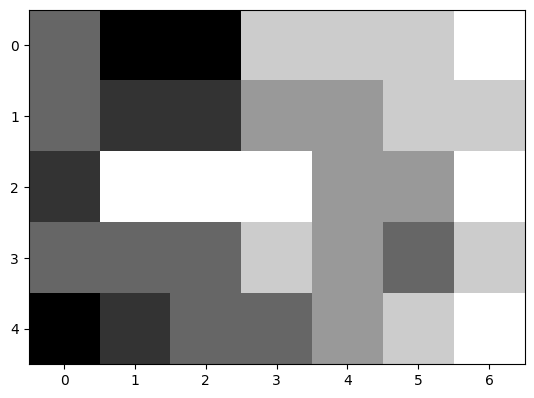

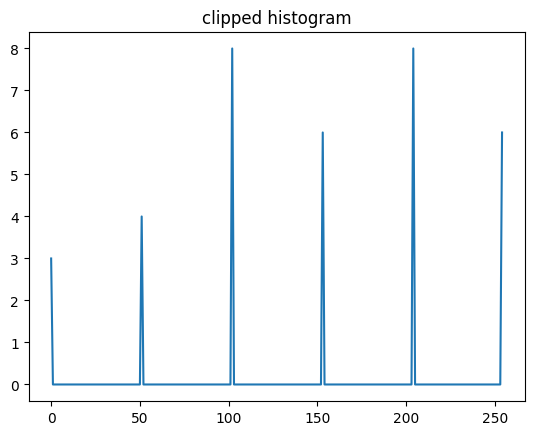

In [29]:
#dont change this cell
min_value = 139
max_value = 144 
plt.imshow(clip_hist(image1,min_value,max_value),cmap='gray',vmin=0,vmax=255)
plt.figure()
plt.plot(calc_hist(clip_hist(image1,min_value, max_value)))
plt.title('clipped histogram')

# part3


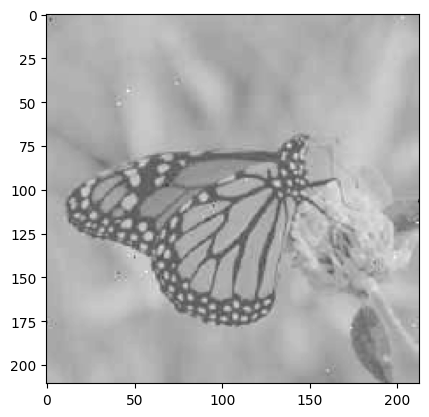

In [30]:
# first read the image and show it.(image2)
image2 = cv.imread('image2.png', cv.IMREAD_GRAYSCALE)
plt.imshow(image2,cmap='gray')
# plt.figure()
# plt.plot(calc_hist(image2))
# plt.title('stretched histogram')

Text(0.5, 1.0, 'stretched histogram')

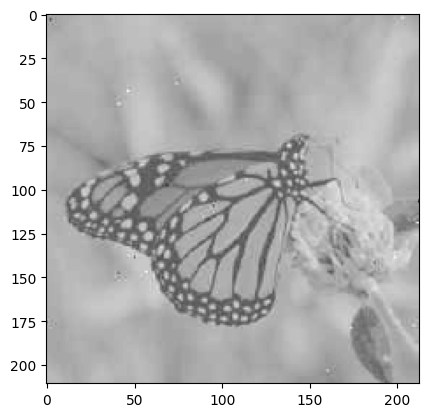

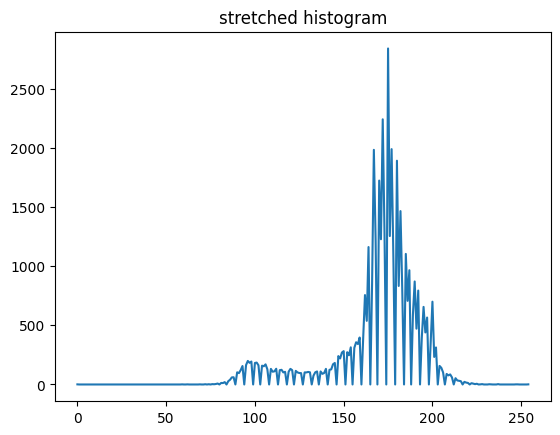

In [31]:
#use stretch_hist function to improve quality of the image and show it
plt.imshow(stretch_hist(image2),cmap='gray',vmin=0,vmax=255)
plt.figure()
plt.plot(calc_hist(stretch_hist(image2)))
plt.title('stretched histogram')

In [39]:
image2.min(),image2.max()

(0, 201)

Text(0.5, 1.0, 'clipped histogram')

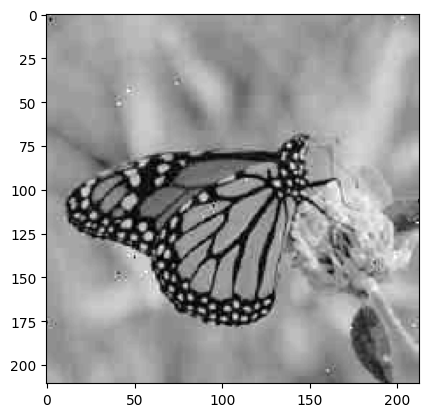

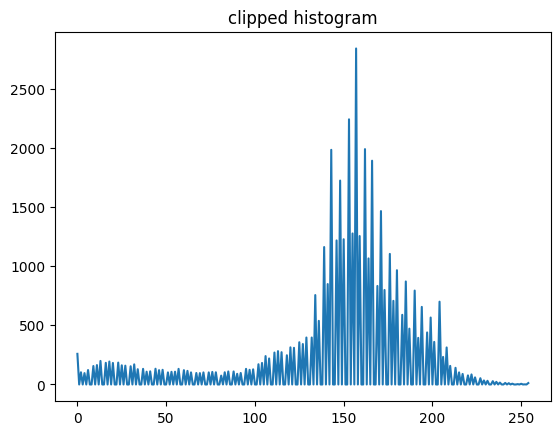

In [35]:
#use clip_hist function to improve quality of the image and show it
min_value = 70
max_value = 180 
plt.imshow(clip_hist(image2,min_value,max_value),cmap='gray',vmin=0,vmax=255)
plt.figure()
plt.plot(calc_hist(clip_hist(image2,min_value, max_value)))
plt.title('clipped histogram')